In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import re
import seaborn as sns
from sklearn.ensemble import RandomForestRegressor
from sklearn.inspection import permutation_importance
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.preprocessing import StandardScaler

In [2]:
x_train = pd.read_csv(
  "../data/processed/x_train.csv", index_col=0, dtype=str
)
x_test = pd.read_csv(
  "../data/processed/x_test.csv", index_col=0, dtype=str
)
y_train = pd.read_csv(
  "../data/processed/y_train.csv", index_col=0, dtype=float
).squeeze("columns").reset_index(drop=True)
y_test = pd.read_csv(
  "../data/processed/y_test.csv", index_col=0, dtype=float
).squeeze("columns").reset_index(drop=True)

In [3]:
zip_cols = x_train.columns[
  [re.search('zip_is', col) is not None for col in x_train.columns]
]

In [4]:
def get_correct_types_x(df, numeric_cols):
    for col in ['deenergize_time', 'restoration_time']:
        df[col] = pd.to_datetime(df[col], format='%Y-%m-%d %H:%M:%S')
    for col in numeric_cols:
        df[col] = df[col].astype(float)
    return df
numeric_cols = [
    'hftd_tier', 'total_affected', 'residential_affected',
    'longitude', 'latitude', 'total_pop', 'median_age', 'median_income',
    'white_pct', 'tmin_d-5', 'tmax_d-5', 'wspd_d-5', 'tmin_d-4', 'tmax_d-4',
    'wspd_d-4', 'tmin_d-3', 'tmax_d-3', 'wspd_d-3', 'tmin_d-2', 'tmax_d-2',
    'wspd_d-2', 'tmin_d-1', 'tmax_d-1', 'wspd_d-1'
]
x_train = get_correct_types_x(x_train, numeric_cols)
x_test = get_correct_types_x(x_test, numeric_cols)
rel_x_train = x_train[numeric_cols]
rel_x_test = x_test[numeric_cols]

In [5]:
scaler = StandardScaler()
scaler.fit(rel_x_train)
scaled_train_x = scaler.transform(rel_x_train)
scaled_test_x = scaler.transform(rel_x_test)

In [6]:
scaled_train_x = np.hstack([scaled_train_x, np.array(x_train[zip_cols])])
scaled_test_x = np.hstack([scaled_test_x, np.array(x_test[zip_cols])])

In [8]:
best_rf = RandomForestRegressor(
    n_estimators=300,
    max_features='log2',
    max_depth=10,
    criterion='squared_error',
    random_state=6
)
best_rf.fit(scaled_train_x, y_train)
best_preds = best_rf.predict(scaled_test_x)

762.8937413882167

In [9]:
resids = y_test - best_preds

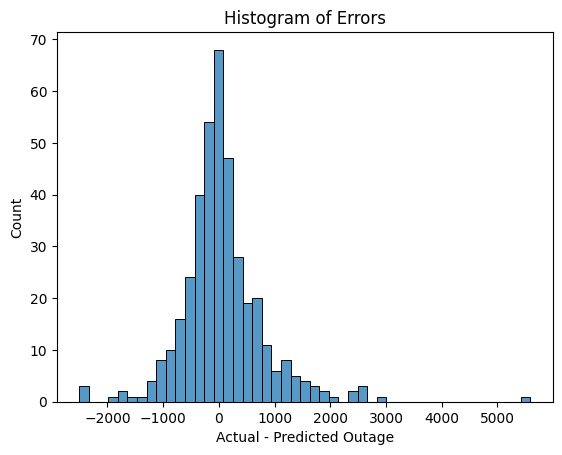

In [15]:
sns.histplot(resids)
plt.title("Histogram of Errors")
plt.xlabel("Actual - Predicted Outage")
plt.show()